## CS 237 Homework 10 (Programming Problem) 

**Due Thursday April 14th at Midnight (1 minute after 11:59pm) in Gradescope (with grace period of 6 hours).
Homeworks may be submitted up to 24 hours late with a 10% penalty (same grace period).**

Enter your solutions in this notebook and submit as an IPYNB file on Gradescope. Don't forget to include information about your collaborators (or say **Collaborators: none**).

###  General Instructions:  Reservoir Sampling

This notebook provides a brief introduction to data streams and randomized algorithms. Specifically, we will study the problem of sampling an item uniformly at random from a data stream. The algorithm we will describe is called reservoir sampling and it is an important tool in Computer Science and beyond. This was covered in lecture this week and you might also look at [this wikipedia page](https://en.wikipedia.org/wiki/Reservoir_sampling)).

In general, reservoir sampling can be used to select $k$ random samples from a stream with $n$ items, where $n$
is of course unknown.  For simplicity, we investigate only the case for $k=1$, i.e., a single random sample from the stream. 

In [1]:
# Here are some imports which will be used in code that we write for CS 237

# Imports used for the code in CS 237

import numpy as np                # arrays and functions which operate on array
import matplotlib.pyplot as plt   # normal plotting
from numpy.random import random, seed

from collections import Counter

%matplotlib inline 


# This draws a useful bar chart for the distribution of the
# list of integers in outcomes

def show_distribution(outcomes, title='Probability Distribution', my_xticks = [], f_size = (8,6)):
    plt.figure(figsize=f_size)
    num_trials = len(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    if my_xticks != []:
        plt.xticks(X, my_xticks)
    elif (X[-1] - X[0] < 30):
        ticks = range(X[0],X[-1]+1)
        plt.xticks(ticks, ticks) 
    plt.xlabel("Outcomes")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()
    
# Example of use

#show_distribution([1,4,3,5,4,6,2,4,3,5,4])
   


## Data streams

A data stream is an extremely long sequence of items that you can only read only once, in order. A good example of a data stream is the sequence of packets that pass through a router. Here we will assume that we can get the stream items one by one by calling:

```
x = next_stream_element() # returns next element in the stream
```

Here is a small example of a stream that we will use as a test case.

In [2]:
# example stream: 100,99, ..., 3, 2, 1
startN = 100

def stream_initialize(startingN=startN):
    global N
    N = startingN+1

def next_stream_element():
    global N
    N = N - 1
    if N < 1:
        return '#'
    return N


In [3]:
# test it!
stream_initialize()

In [4]:
# test it by running this cell a couple of times

next_stream_element()

100

## Reservoir sampling algorithm

The algorithmic task that we want to solve is the following:
 > Choose one item uniformly at random from a data stream, **without knowing the length of the stream in advance**

Complete the next cell to implement the algorithm presented in class.  Note that the algorithm presented processes each item very quickly: it spends O(1) time per stream element. It also uses very little memory: it stores only one stream item and a counter that counts the number of stream items that have arrived so far.

## Data stream algorithms

Data stream algorithms must process each item in the stream quickly, using very little memory; there is simply too much data to store, and it arrives too quickly for any complex computations. Every data stream algorithm looks roughly like this:

```
def do_something_interesting():
  while True:
    x = next_stream_element() # returns next element in the stream
    if x == '#'  # end of stream marker
      break
    do something interesting with x
  return something
```

Let us now test the algorithm. We will perform $10^5$ trial runs of the reservoir sampling algorithm on the example stream (see above) and plot the empirical distribution of the sampled items using `show_distribution`. Note that, if the algorithm is correct, the distribution is uniform over the data stream, i.e., each item has probability 1/n of being sampled, where n is the length of the stream. In this case n = 100.

In [5]:
# reservoir sampling algorithm: sample 1 item with uniform probability over the whole stream
import random


def stream_sample():
    n = 0 # number of stream items seen so far
    s = 0 # sampled item
    stream = []
    while True:
        x = next_stream_element() # returns next element in the stream
        stream.append(x)
        if x == '#':  # end of stream marker
            break
        else:
            temp = random.randint(0,n)
            s = stream[temp]
            n+=1
            
            
    
    # Your code here: loop over whole stream, examining each stream item, and replacing the sample s with the new
    # item with probability 1/n. 

    return s

In [6]:
#seed(10)     # try with and without

# trial run on the example stream above
stream_initialize()
print(stream_sample())           

24


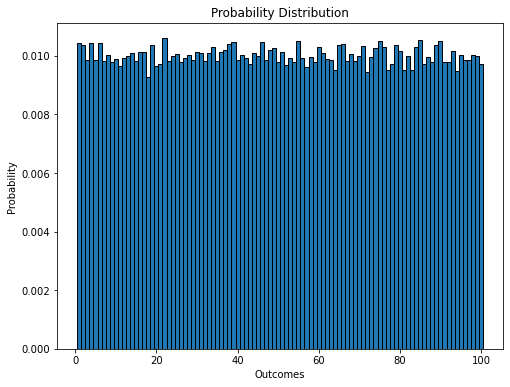

In [7]:
num_trials = 10**5
arr = []
for i in range(num_trials):
    stream_initialize()
    arr.append(stream_sample())
show_distribution(arr)
seed(10)

# Your code here, each trial selects a single sample from the stream
# Display your results using show_distribution

# hint: don't forget to initialize the stream at the beginning of each trial!